[Back to Table of Contents](https://www.shannonmburns.com/Psyc158/intro.html)

[Previous: Chapter 4 - Organizing Data](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-4.ipynb)

# Chapter 5 - Describing Data 

Over the last four chapters you've developed the basic proficiency in coding and data management that will enable you to explore and analyze data in many contexts. These skills are an important foundation for the rest of the course, so it is highly recommended that you practice with them and return to them to review frequently (and keep this url handy to come back to in future classes). 

Next, we are going to turn to how we can apply these skills for statistical insights on the data we've been working with. In this chapter, we will learn about the use of descriptive statistics for summarizing datasets. 

## 5.1 The concept of a distribution

Assuming we have a tidy dataset with many variables, it is a good idea to look at the variation in your measures. This can give you clues about what kind of cleaning is needed, if any errors in data collection happened, and what sort of analyses will best suit the data. This leads us to one of the most fundamental concepts in statistics, the concept of a **distribution**.

A distribution reflects the specific pattern of variation in a variable or set of variables. It is how the data are divided among different possible values. Thinking about distributions requires you to think abstractly, at a higher level, about your data. You must shift your thinking from a focus on the individual observations in your data set (e.g., the 60 people you have sampled) to a focus on all the observations as a group, and the pattern of how they vary. The concept of a distribution allows us to see the whole as greater than the sum of the parts; the forest, and not just the trees.

The features of a forest cannot be seen in a single tree. Measuring the height of a single tree does not allow you to see characteristics of the distribution of height. You can know the height of that one tree, but not the minimum, maximum, or average height of trees in the forest based on a single measurement. Statistics such as the mean do not themselves constitute a distribution; they are features of a distribution, features that don’t apply to individual trees.

Note that not just any bunch of numbers can be thought of as a distribution. The numbers must all be measures of the same attribute. So, for example, if you have measures of height and weight on a sample of 60 people, you can’t just lump the height and weight numbers into a single distribution. You can, however, examine the distribution of height and the distribution of weight separately.

## 5.2 Visualizing distributions

### Histograms
When first learning about distributions, it can help to visualize them. Below are some examples of what distributions can look like: 

<img src="images/ch5-distributions.png" width="600">

This type of image is called a **histogram**. On the x-axis is some value that an observation can have on a variable. In the examples above we see (clockwise from upper left): anxiety scores from the Tetris Memories study; the number of intrusive memories those participants experienced; how long a sample of students slept per night, measured in hours; and the heights of a sample of people, measured in inches. The y-axis represents the *frequency* of some score or range of scores in a sample. So, in the first histogram (in purple), the height of the bars does not represent what STAI score someone got, but instead represents the number of participants in this sample who got a certain score.

There are lots of ways to make histograms in R. In this course we will use the package ```ggformula```  to make our visualizations. It is a large and flexible package, so it can be good to read through a guide to [everything you can do with it](http://www.mosaic-web.org/ggformula/articles/pkgdown/ggformula-long.html) for help or inspiration. ```ggformula``` is a weird name, but that’s what the authors of this package called it. Because of that, many of the ```ggformula``` commands are going to start with ```gf_```; the ```g``` stands for "graphical" and the ```f``` stands for "formula". 

We will start by making a histogram with the ```gf_histogram()``` function. Here is how to make a basic histogram of ```intrusive_memories``` from the ```tetrismemories``` data frame.

In [1]:
install.packages("ggformula")
library(ggformula)

tetrismemories <- read.csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/tetrismemories.csv")

Installing package into '/Library/Frameworks/R.framework/Versions/4.3-arm64'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//Rtmp0Uj7bo/downloaded_packages


Loading required package: ggplot2

Loading required package: scales

Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")



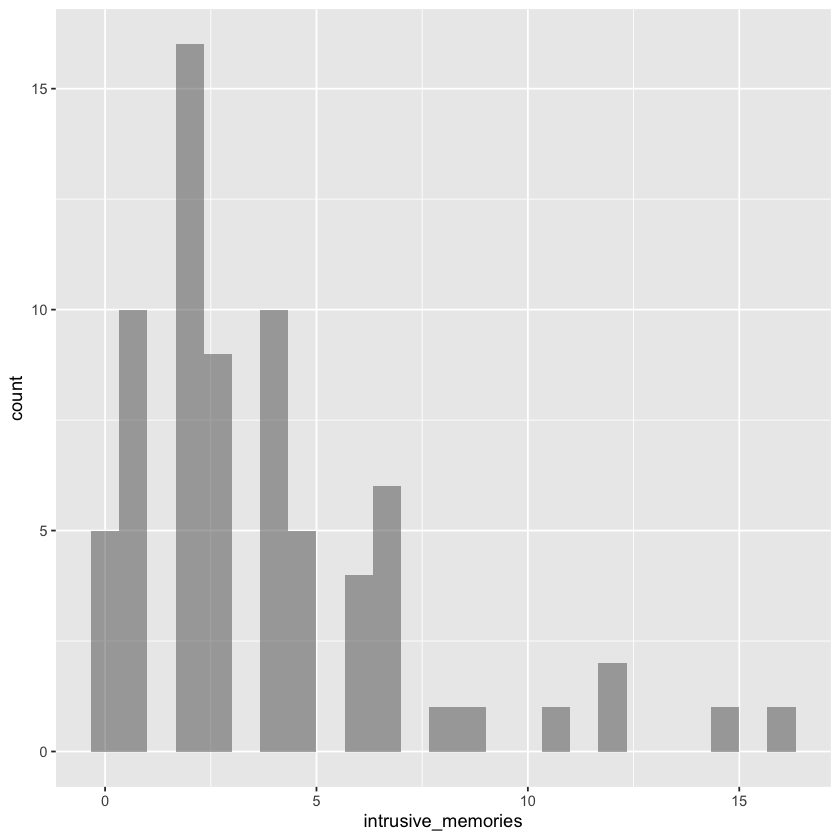

In [6]:
gf_histogram(gformula = ~ intrusive_memories, data = tetrismemories)

```gf_formula``` takes two arguments. The first is a *formula* (using the argument name ```gformula```). In this formula, notice that the variable we want to display, ```intrusive_memories```, is placed after a ~ symbol (tilde). The ~ works like an equal sign in the equation for graphing a line (e.g., ```y = mx + b``` from geometry class). So in R, whenever you put something before the ~, its values go on the y-axis and whenever you put something after the ~, its values go on the x-axis. A histogram is a special case where the y-axis is just a count related to the variable on the x-axis, not a different variable. Thus, the ```gformula``` argument in ```gf_formula``` is the formula ``` ~ instrusive_memories```, which tells R "plot the variable intrusive_memories on the x-axis."

The second argument is ```data = tetrismemories```, which tells R which data frame to find ```intrusive_memories``` in.

This is an example of using named arguments to explicitly tell R which argument values should be what. By using the named argument syntax with ```=``` signs, you can put these name/value pairs in any order inside the function call; e.g. ```gf_formula(data = tetrismemories, gformula = ~ intrusive_memories)``` would still work. You can also leave off the argument names ```gformula =``` and ```data =```, but in that case you have to enter the argument values in the specific order this function expects by default (formula first, then data). [Looking up](https://www.rdocumentation.org/packages/ggformula/versions/0.6/topics/gf_histogram) a function online or using the ```?``` symbol before a function name will always tell you how to use a function if you forget.

Now say we wanted to change the histogram to one that plots the variable ```STAI_T``` on the x-axis instead. Rewrite the code below to do so.

In [ ]:
#Change the plotted variable to STAI_T
gf_histogram(gformula = ~ intrusive_memories, data = tetrismemories)

Because the variable on the x-axis is often measured on a continuous scale with many possible values, the bars in the histograms usually represent a range of values, called bins. We’ll illustrate this idea of bins by creating a simple outcome variable called ```outcome```, and displaying it on a histogram.

In [7]:
outcome <- c(1,2,3,4,5)
tiny_data <- data.frame(outcome) #gf_histogram only works on dataframe objects, not vectors

#Write some code below here to plot a histogram of the variable "outcome" in the dataframe "tiny_data"


This histogram shows gaps between the bars because by default ```gf_histogram()``` sets up 30 bins, even though we only have five possible numbers in our variable. If we change the number of bins to 5, then we’ll get rid of the gaps between the bars. To do this, we add in a new argument that ```gf_histogram()``` can accept: ```bins```. 

In [ ]:
gf_histogram(gformula = ~ outcome, data = tiny_data, bins = 5)

Now we only have one bin per data value. However, since there are exactly one of each type of value, this histogram looks like a rectangle. To help distinguish things more, we can change the colors of the histogram, adding in the arguments ```color``` and ```fill```. What do you think each of these arguments does?

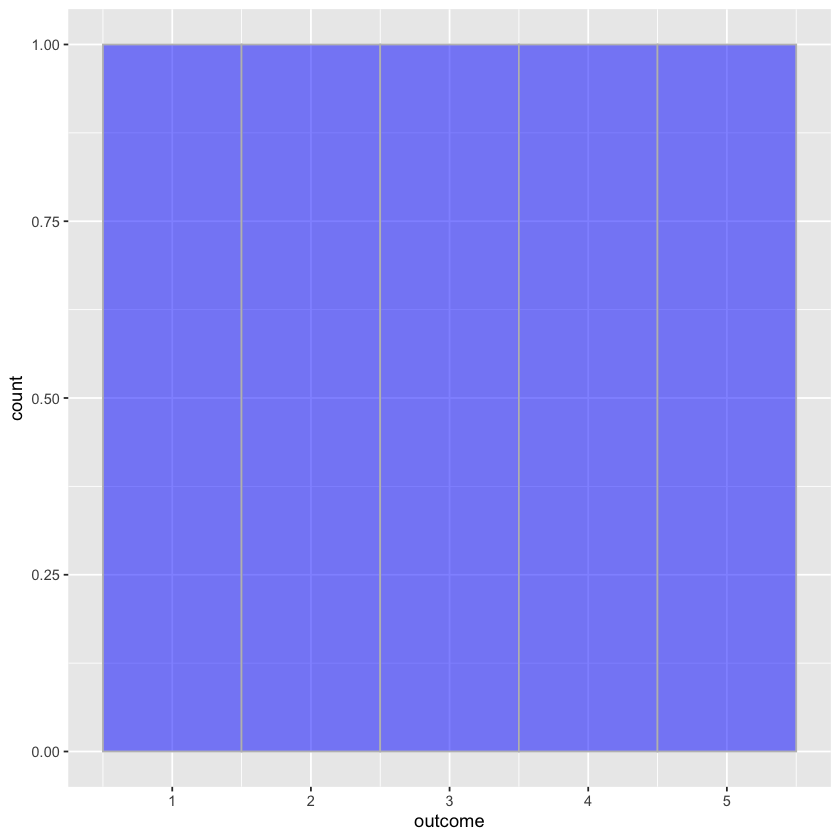

In [8]:
gf_histogram(gformula = ~ outcome, data = tiny_data, bins = 5, color = "gray", fill = "blue")

In chapter 7, we'll talk much more about how to tweak the details of our data visualizations.

### Density plots
**Density plots** are a lot like histograms, except on the y-axis is the *proportion* (or percentage) of the data that falls into a bin, rather than the raw count number. The only real difference between a histogram and density plot is how the y-axis is represented.

The function ```gf_dhistogram``` will plot a density plot (note the d before the word histogram, to distinguish it from the regular histogram function). 

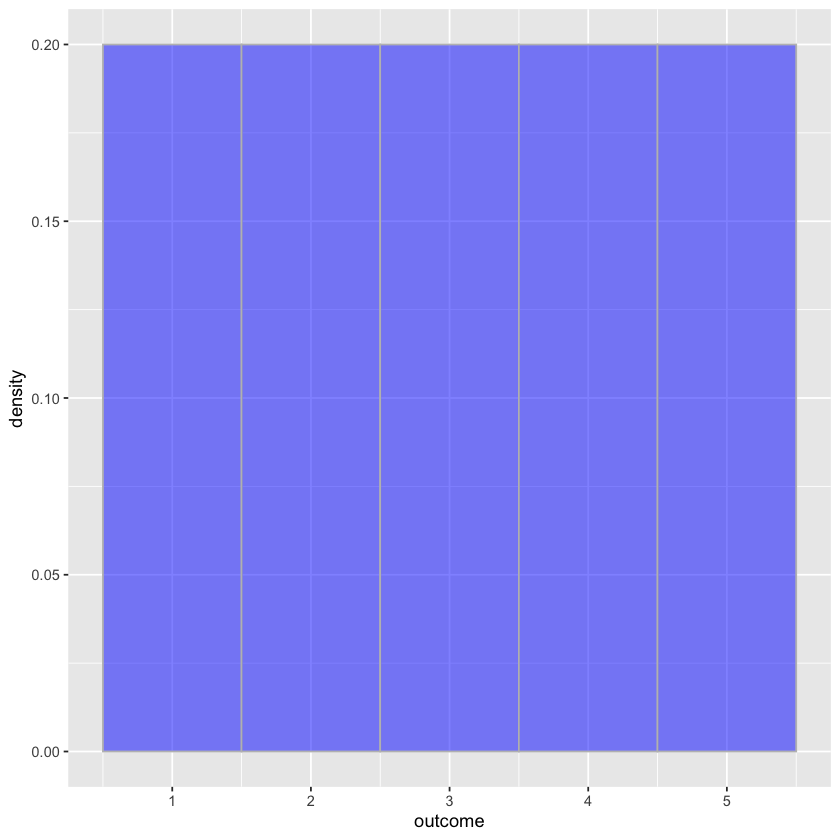

In [9]:
gf_dhistogram(gformula = ~ outcome, data = tiny_data, bins = 5, color = "gray", fill = "blue")

If everything worked right, the general shape of this plot should match the one above. The only difference is, the bins show a density of 0.2 instead of 1, since 1 value out of 5 means 20% of the sample is in that bin.

In the window below, write some code to make a density plot of the ```tetris_total_score``` variable in the ```tetrismemories``` data.

In [ ]:
#Finish the code below to make a density plot of Age in mindsetmatters
gf_dhistogram(#set formula here, #set data frame here, #set bin and color options here)


You may have gotten a warning by running this that said ```Warning message: "Removed 36 rows containing non-finite values (`stat_bin()`).”```. Warnings in R mean your code can still run, but the program thinks something happened that you should pay attention to. In this case, there are 36 observations that have missing data in ```tetris_total_score```. Since it's impossible to plot something that doesn't exist, this function ignored those rows when plotting. Some functions are able to manage missing values this way, others will break completely with an error when you try to pass data with missing values. As you use R more you'll start getting a sense of which ones behave which way. You'll also start learning what error messages mean so you can learn to use new functions correctly. 

In summary, the very first thing you should always do when analyzing data is to examine the distributions of your variables. If you skip this step, and go directly to the application of more complex statistical procedures without knowning the nature of your data, you do so at your own peril. Histograms are a key tool for examining distributions of variables to make sure the data are ok, and that your planned analysis will be appropriate. 

Besides visualizing a distribution, we can also describe it with specific metrics. In general, a distribution can be described with three things: its shape, center, and variability.

## 5.3 Shape

Look back at the density plot you made for ```tetrismemories$intrusive_memories```, and take note of the general shape the whole dataset takes. Where is the peak of the the distribution? What are the most infrequent values? Statisticians describe the shapes of distributions using a few key features. Distributions can be **symmetrical**, or they can be **skewed**. A symmetrical distribution has a peak generally in the center of the x-axis, and the left side of the shape is close to a mirror image of the right side. If a distribution is skewed, it can be skewed left (the skinny longer tail is on the left, like someone stretched out that side) or skewed right (the skinny longer tail is on the right). 

It's rare to find a distribution perfectly symmetrical, but the more skewed something is the more we should take note of it. The distribution above has a fairly large skew to the right.

Other ways to talk about the shape of distributions include:
- **uniform**, meaning the number of observations is evenly distributed across the possible scores and there is no peak in the data (remember the rectangle histogram we made earlier?)  
- **unimodal**, meaning that there is one peak in the data 
- **bimodal** (or multimodal), having two (or more) clear peaks with only a few data values in between

Do you think the ```intrusive_memories``` distribution above is uniform, unimodal, or bimodal?

You will often see distributions that match a particular shape and skewness. These special distribution types have names. For instance, the **normal** distribution is symmetric and unimodal, looking like a bell:

In [ ]:
normal_data <- rnorm(n = 1000, mean = 0, sd = 1) 
#rnorm is a function that generates data in a normal distribution;
# we'll talk about simulating data like this in a later chapter

gf_dhistogram(gformula = ~ data_pts, data = data.frame(data_pts = normal_data))

Usually, distributions are kind of lumpy and jagged, so many of these features should be thought of with the word “roughly” in front of them. Even if a distribution doesn’t have exactly the same number of observations across all possible scores — but has roughly the same number — we should still call that distribution uniform. If you look at the density plot above, you might see some extra lumpiness along the sides of the bell curve. Some people might initially think this is a bimodal distribution. But statisticians would consider it roughly unimodal and roughly normal because the lumps are quite small compared to the main peak.

If a distribution is unimodal, it is often useful to notice where the center of the distribution lies. If lots of observations are clustered around the middle, then the value of that middle could be a handy summary of the sample of scores, letting you make statements such as, “Most of the data in this sample are around this middle value.”

## 5.4 Center

There are specific numbers that represent what that middle point is for a distribution. We mentioned in chapter 1 that one of the central principles of statistics is the idea that we can better understand the world by throwing away information, and that’s exactly what we are doing when we summarize a dataset and describe its center value. In most situations, after checking out the shape of the data distribution, the next thing that you’ll want to calculate is a measure of **central tendency**. That is, you’d like to know something about where the “average” or “typical” value of your data lies. The three most commonly used measures are the mean, median, and mode.

### Mean
The **mean** of a set of observations is a traditional average: add all of the values up, and then divide by the total number of values. If a student's five exam scores were 76, 91, 86, 80 and 92, the mean of those scores would be:

$$\frac{76 + 91 + 86 + 80 + 93}{5} = 85.2$$

To calculate the mean in R, you could type out that exact formula above and have R work for you like a calculator: ```(76 + 91 + 86 + 80 + 93)/5```. However, that’s not the only way to do the calculation, and when the number of observations starts to become large, it’s very tedious. Besides, in almost every real world scenario, you’ve already got the actual numbers stored in a variable of some kind, like ```test_scores <- c(76,91,86,80,93)```. Under those circumstances, you can use a combination of the ```sum()``` function and the ```length()``` function:

In [14]:
test_scores <- c(76,91,86,80,93)
#This computes a mean
sum(test_scores) / length(test_scores)

[1] 85.2

Although it’s pretty easy to calculate the mean like this, we can do it in an even easier way. Since the mean is such a common metric to compute, R also provides us with the ```mean()``` function. Simply pass a vector to this fuction to return the mean. Try it in the code block below.

In [ ]:
#Use mean() to calculate the mean of test_scores:

#Evaluate the code below. Do you think it will be the same as your mean calculation?
sum(test_scores) / length(test_scores)

### Median
The mean is a really useful way of describing what the central tendency of a distribution is. However, sometimes it doesn't work as well as one might think. Imagine two distributions: ```dist1 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10)``` and ```dist2 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10, 100).``` Plot these as density plots below.

In [ ]:
dist1 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10)
dist2 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10, 100)

#Write code to plot the density plot of each of these distributions, using df_dhistogram()


While ```dist2``` has an obvious outlier, most people would say a value that best represents the majority of the data is still around 10, like in ```dist1```. However, now calculate the mean of each distribution:

In [ ]:
#Calculate mean of dist1

#Calculate mean of dist2


The mean of ```dist2``` is way off of the mean of ```dist1```. This sort of situation is not uncommon - in fact, the mean of any distribution with appreciable skew will fall towards the long tail rather than the peak of the rest of the data. In this case, a better measure of central tendency can be the **median**. 

The median is even easier to describe than the mean. The median of a set of observations is just the middle value, when the values are in numerical order. As before, let’s imagine we were interested in a student's five test scores. To figure out the median, we sort these numbers into ascending order, 76,80,**86**,91,93. The value in the middle, bolded here, is the median. 

It's easy to find the middle value in a set of numbers that are an odd-numbered length. But what should we do if ```test_scores``` had 6 values instead? E.g., 76,80,**86,91**,93,94. Now there are *two* middle numbers, 86 and 91. In this case, the median is defined as the average of these: 88.5. 

As before, it’s very tedious to do this by hand when you’ve got lots of numbers. Luckily in R, we have the ```median()``` function:

In [ ]:
median(test_scores)

### Mode
The last common measure of central tendency is the **mode**. This is the most frequent value within our data - what we've been calling the "peak" of a distribution. In a somewhat normal distribution, this is near the middle of the curve with the mean and median. But in a really weird distribution, where, say, the most extreme values are the most common, the mode could be way off. 

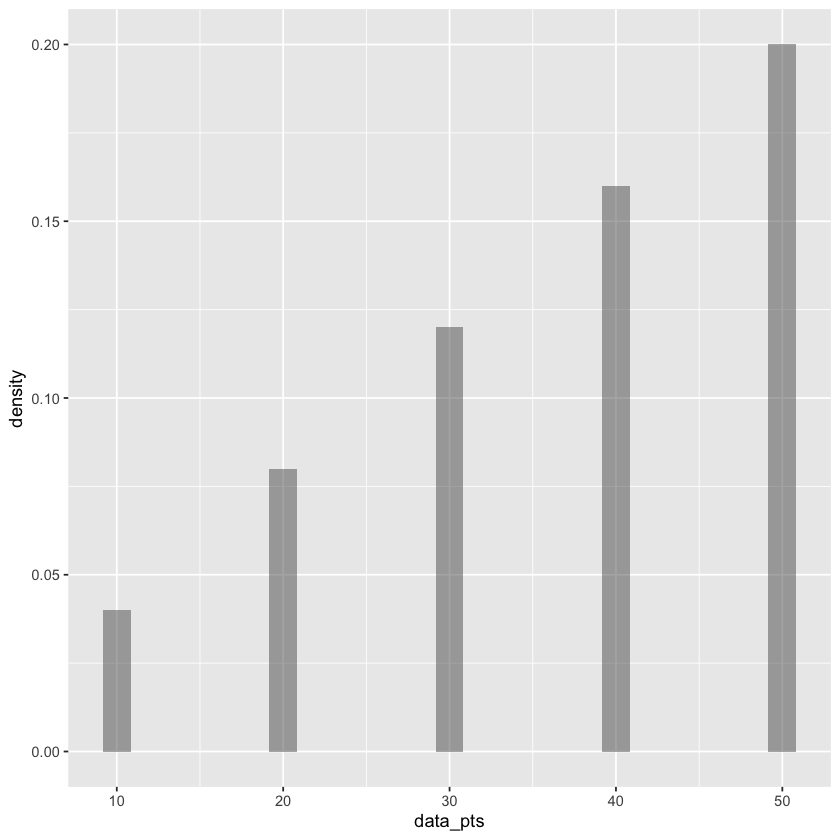

In [11]:
#Visualize a weird distribution. Where is the mean versus the median versus the mode?
weird_dist <- data.frame(data_pts = c(10,20,20,30,30,30,40,40,40,40,50,50,50,50,50))
gf_dhistogram(gformula = ~ data_pts, data = weird_dist)

You may have tried to use a function like ```mode()``` in the code block above to calculate the mode of the dataframe ```weird_dist```. However, in R ```mode()``` is already taken up by a different function that does something else. So we'll need a different method to describe our distribution. Given that the mode is the most frequent data value in a distribution, we can use the ```table()``` function to list the number of data points with each unique value, and identify the mode that way:

In [12]:
table(weird_dist$data_pts)


10 20 30 40 50 
 1  2  3  4  5 

Because the mode can be far away from the middle of the value range in distributions like this, it may be better to think of the mode as more of a measure of "typicality" rather than a measure of "central tendency."

### Which measure of central tendency to use?
When do you pick between mean, median, and mode? There's no hard and fast rule - for each use case, you'll want to think about the message you're trying to send with your summary, as well as the nature of the underlying data. But here are some things to think about when making your decision:

- The mean is a good default - many statistical tools are based on the mean, and lots of people know what it is. 
- As already mentioned, if you have a highly skewed distribution, median may be better than mean for describing the middle of the data.
- If your data are categorical, it doesn't make sense to calculate the mean or the median. Both the mean and the median rely on the idea that the numbers assigned to values are meaningful - i.e., can you say what the mean is of {apple, orange, banana, watermelon}? If data values aren't related numerically, it's best to use mode. 
- If your data are ordinal scale, you’re more likely to want to use the median than the mean. For instance, when measuring the typical number of children that an American household has, you can only have whole-numbered children. However, if we calculate the [average child number per family in 2020](https://www.statista.com/statistics/718084/average-number-of-own-children-per-family), we get 1.93. A partial amount of a child doesn't really make sense when discussing the typical number of children one might find in a household. Instead, it would make more sense to use the median: 2. 

## 5.5 Variability

Lastly we come to variability. Variability refers to how spread out (or wide) the distribution is. Central tendency tells us what the most typical values are like, but we don't want to completely ignore the infrequent scores. Two distributions can have a mean of 60, but if the range of one is 50 to 70 while the range of another is 2 to 200, those are obviously different distributions of data. Variability also has multiple measures we can use. 

### Range
The **range** of a variable is very simple: it’s the biggest value minus the smallest value. For ```test_scores``` data, the maximum value is 93, and the minimum value is 76. We can calculate these values in R using the ```max()``` and ```min()``` functions:

In [ ]:
#Max of test_scores
max(test_scores)

#Min of test_scores
min(test_scores)

#Calculate the range of test_scores by subtracting the min from the max


The other possibility is to use the ```range()``` function, which outputs both the minimum value and the maximum value in a vector, like this:

In [ ]:
range(test_scores)

Although the range is the simplest way to quantify the notion of variability, it’s one of the worst. Recall from our discussion of the mean that we want our summary measure to be robust (meaning it isn't affected by outliers very much). If the dataset has one or two extreme values in it, we’d like our statistics not to be unduly influenced by these cases. If we look once again at our toy example of a data set containing a very extreme outlier, ```dist2 <- c(10, 10, 11, 9, 11, 12, 8, 9, 10, 100)```, it is clear that the range is not robust, since this has a range of 92 unless the outlier were removed; then we would have a range of only 4.

### Interquartile range
The **interquartile range (IQR)** is like the range, but instead of calculating the difference between the biggest and smallest value, it calculates the difference between the 25th quantile and the 75th quantile. What is a quantile? 
the 25th quantile of a data set is the smallest number x such that 25% of the data is less than x. This is also called percentiles, which you may have heard before. 

In fact, we’ve already come across the idea: the median of a data set is its 50th quantile / percentile! R actually
provides you with a way of calculating quantiles, using the (surprise, surprise) ```quantile()``` function. Let’s
use it to calculate the median of ```STAI_T``` in the ```tetrismemories``` dataset:

In [ ]:
quantile(tetrismemories$STAI_T, probs = 0.5, na.rm = TRUE)
median(tetrismemories$STAI_T, na.rm = TRUE)

<div class="alert alert-block alert-info">
<b>Note</b>: summary functions like quantile() and median() are some of those functions that break with NA values. To make it skip over them, add the argument "na.rm=TRUE". This turns a setting "should I remove NA values?" to TRUE.
</div>

Not surprisingly, The 50% quartile and the median agree. Now, we can actually input lots of quantiles at once, by specifying a vector for the probs argument. So lets do that, and get the 25th and 75th percentile:

In [ ]:
quantile(tetrismemories$STAI_T, probs = c(0.25,0.5,0.75), na.rm = TRUE)

Since the IQR is the 75th quartile minus the 25th quartile, our IQR is 38.25 - 27 = 11.25. As you might have suspected by now, R also gives us a way to calculate the IQR directly:

In [ ]:
IQR(tetrismemories$STAI_T, na.rm = TRUE)

The simplest way to think about IQR is that it contains the “middle half” of the data. That is, one quarter of the data falls below the 25th quartile, one quarter of the data is above the 75th quartile, leaving the “middle half” of the data lying in between the two. The IQR is the range covered by that middle half.

### Sum of Squares
The two measures we’ve looked at so far, the range and the interquartile range, both rely on the idea that we can measure the spread of the data by looking at the quantiles of the data. However, this isn’t the only way to think about the problem. A different approach is to select a meaningful reference point (usually the mean or the median) and then report how much all the data points deviate from that reference point. If there's a lot of deviation, that means many points are far away from the middle and thus our distribution is spread out. If there's not much deviation, most datapoints are clumped closely around the middle.

Since the previous paragraph might sound a little abstract, let’s go through what "deviation" means a little more slowly. Let’s think about our ```test_scores``` data, ```c(76,91,86,80,93)```. Since our calculations rely on an examination of the deviation from some reference point (in this case the mean), the first thing we need to calculate is the mean. In math, the mean of a variable X is often written as X with a horizontal line above it, so we'll use that here to help us write out our calculation. For the five observations of ```test_scores```, our mean is 

$$\bar{X} = 85.2$$

The next step is to convert each of our observations in X into a deviation score. That means calculating the difference between each score, $X_i$, and the mean $\bar{X}$. That is, the deviation score is defined to be 

$$X_i - \bar{X}$$

For the first observation in our sample, this is equal to 76 - 85.2 = -9.2. By repeating this calculation for each data point in a sample, we know how far away each data point is from the sample mean.  

| Which score   | Value        | Deviation from mean   |
| :-----------: | :----------: | :-------------------: | 
| 1             | 76           | -9.2                  |
| 2             | 91           | 5.8                   |
| 3             | 86           | 0.8                   |
| 4             | 80           | -5.2                  |
| 5             | 93           | 7.8                   |

Now that we have calculated the absolute deviation score for every observation in the dataset, we could sum these up to say "here is the total amount of deviation in this distribution."

In [15]:
mean_score <- mean(test_scores)   # mean of the data
devs <- test_scores - mean_score  # all deviations from the mean
sum(devs)                         # sum of the deviations

[1] -1.421085e-14

Uh oh, there seems to be a problem. Our sum of deviations is practically 0 (-1.42e<sup>-14</sup> is a really, really small number!). Surely there is more deviation in our dataset than that?

The reason this happened is because some data points are above the mean (a positive difference score), and some are below the mean (a negative difference score). When you sum up positive and negative numbers, they cancel each other out. 

One way to get around this is to square every difference score. This gets rid of negative numbers and allows us to calculate the total amount of deviation in a dataset more effectively. This calculation is called the **sum of squares**. Statisticians often use squaring instead of something like the absolute number to get rid of negative values for reasons that are beyond the scope of this course, ([but you can read about it if you like](https://medium.com/@kaushalsharma880/squared-error-vs-absolute-values-5c2624bc5ade#:~:text=There%20are%20various%20reasons%20for,not%20differentiable%20at%20x%20%3D%200)). 

Here's the formula for sum of squares: 

$$SS(X) = \sum_{i=1}^{N}(X_i-\bar{X})^2$$

To break this down, it's the sum ($\sum_{i=1}^{N}$) of all squared deviations ($(X_i-\bar{X})^2$). Hence the name! 

### Variance

Sum of squares represents the total amount of deviation from the mean that all the points in a dataset have. That causes problems though if we ever want to compare datasets of different sizes - a variable with 10 items that all vary from the mean by 1 would have a lower total deviation than a variable with 100 items that all vary from the mean by 0.5, even though we would think the latter variable has less spread. This is why it's also good to represent the amount of deviation in a dataset relative to how many data points are in it. This is a measure called the **variance**. 

We've used this word before to talk about the general concept of data varying, but here it is a specific measure with a specific formula. The variance of a data set X is sometimes written as Var(X), but it’s more commonly denoted s<sup>2</sup> (the reason for this will become clearer shortly). The formula that we use to calculate the variance of a set of observations is as follows:

$$Var(X) = \frac{1}{N-1}\sum_{i=1}^{N}(X_i-\bar{X})^2$$

It is very similar to the equation for sum of squares, except for one change. We take the sum of squares, and then divide the whole thing by N-1.

<div class="alert alert-block alert-info">
<b>Note</b>: It may seem strange that we're dividing by N-1 instead of N like in an average calculation. The reason for this is a bit nuanced and will be covered in chapter 15, so for now just take it on faith that this is correct.
</div>

Calculating variance in R is really simple, since there is a built in function for the whole process: ```var()```.

In [17]:
var(tetrismemories$intrusive_memories, na.rm = TRUE)

[1] 11.2768

Now, what does the variance actually *mean*? Descriptive statistics are supposed to describe things, after all, and right now the variance is kind of a gibberish number. Unfortunately, the reason why we haven’t given you the human-friendly interpretation of the variance is that there really isn’t one. This is the most serious problem with the variance. Although it has some elegant mathematical properties that help a lot for deriving other statistical tools, it by itself is pretty useless if you want to communicate with an actual human because variances are uninterpretable in terms of the original variable. All the numbers have been squared, and they don’t have units anymore. What counts as low or high variance? What does it mean for number of memories to vary at a quantity of 11? These questions don't have good answers. However, because it is so ubiquitous in statistics at large, we still need to know how to calculate it. Basically, just know that higher variance means more data spread. 

### Standard deviation 
Suppose that you like the idea of using variance because of those nice mathematical properties you were promised, but – since you’re a human and not a robot – you’d like to have a measure that is expressed in the same units as the data itself (i.e., number of memories, not memories-squared). What should you do? The solution to the problem is to take the square root of the variance, known as the **standard deviation,** also called the “root mean squared deviation”, or RMSD. This solves our problem fairly neatly: while nobody has a clue what “a variance of 11.28 memories-squared” really means, it’s much easier to understand “a standard deviation of 3.36 memories”, since it’s expressed in the original units. Interpret it as the typical amount of deviation you expect any randomly-chosen data point to have from the mean. 

It is traditional to refer to the standard deviation of a sample of data as ```s```, though “sd” and “std dev” are also used at times. Because the standard deviation is equal to the square root of the variance, you probably won’t be surprised to see that the formula is:

$$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(X_i-\bar{X})^2}$$

and the R function to calculate it is ```sd()```.

In [ ]:
# Find the standard deviation of tetrismemories$intrusive_memories using sd(), and verify 
# that it produces the same result as the square root of var()
memories_var <- var(tetrismemories$intrusive_memories, na.rm = TRUE)
memories_sd <- sd( #type your code here )
sqrt(memores_var) == memores_sd

Besides telling us about a typical amount of deviation in our data distribution, standard deviation can also tell us how much of the data deviates by that amount. In general, ~68% of the data will fall within 1 standard deviation of the mean, ~95% of the data will fall within 2 standard deviations, and ~99.7% of the data will fall within 3 standard deviations. This rule tends to work pretty well most of the time, but it’s not exact: it’s actually calculated based on an assumption that the histogram is normally distributed. But even with skewed distributions, this rule is pretty close. 

### Which measure of variability to use?

We’ve discussed quite a few measures of spread (range, IQR, sum of squares, variance, and standard deviation), and hinted at their strengths and weaknesses. Here’s a quick summary:

- Range: Gives you the full spread of the data. It’s very vulnerable to outliers, and as a consequence it isn’t often used unless you have good reasons to care about the extremes in the data.
- Interquartile range: Tells you where the “middle half” of the data sits. It’s pretty robust, and complements the median nicely. 
- Sum of squares: Tells you how the total amount of squared deviations in a dataset. Rarely used to summarize a distribution by itself, but serves as the basis of other statistical tools. 
- Variance: Tells you the average squared deviation from the mean. Similarly to sum of squares, it's mathematically useful but uninterpretable to humans because it doesn’t use the same units as the data. Infrequently used as a standalone summary statistic.
- Standard deviation: This is the square root of the variance. It’s fairly elegant mathematically, and it’s expressed in the same units as the data so it can be interpreted pretty well. In situations where the mean is the measure of central tendency, this is the most popular measure of spread.

## 5.6 Reporting distribution summaries

Shape, central tendency, and spread are the first major statistical tools you've officially learned in order to describe sets of data. Congrats, you're doing statistics! Specifically, you are doing what is called descriptive statistics - calculating numbers that describe a sample of data. 

However, there's not much point to doing all that work if you can't share the results with other people. Given all the words and equations we used to describe concepts like median or standard deviation, it can be a lot of work to write out descriptions of all of that when communicating about your results to other people. Thus, the psychology community has decided on some standards to use when writing about results in research reports. Psychologists use the [style guide](https://www.pindling.org/Math/Statistics1/Textbook/Appendix/APA_Style.pdf) dictated by the American Psychological Association ("APA style") for reporting statistics, and you should get in the practice of writing your results in this way as well. Here is what APA style has to say about how to share the kinds of statistics we learned in this chapter:

### Central tendency
Measures of central tendency are reported in APA style using the italic symbol *M* for mean and *Mdn* for median. There is no symbol for mode, as it isn't used very frequently (if you do need to report it, just write it as *Mode*). Reporting the mean in the body of some text may look like:

"The pretest score for the group is lower (*M* = 20.5) than the posttest score (*M* = 65.3)."

The full name of the statistics may also be used in describing it in a narrative text. Here is an example statement about the median of two categories:

"The median time for the treatment group was 4.5 hours, compared to a median of 2.5 for the control group."

When there are many means or medians to report (3+), putting those results into a table is more appropriate than cluttering your text with numbers. The table below shows the means of both pretest and posttest scores for male and females on an aptitude test. Notice that the statement about the mean being summarized in this particular table is presented in the table title. 

**Mean Scores for Pre- and Post-test by Gender**

|         | Pre-test  | Post-test  |
| :-----: | :-------: | :--------: |
| Female  | 45.6      | 72.8       |
| Male    | 50.2      | 69.5       |


### Spread
Descriptive statistics of variables involving interval or ordinal scales often report both measurements on central tendency and spread together. Usually, standard deviation is the spread score that is reported. In APA style, the symbol for the standard deviation is italic *SD* (in fact, all statistical abbreviations are italicized in APA style). Other measures of variability either use the abbreviations we've used in this chapter (e.g., IQR) or just the word of the measure. The results of a statistical summary may include the following texts about descriptive statistics:

"The pretest score for the group is lower (*M* = 20.5, *SD* = 4.1) than the posttest score (*M* = 65.3, *SD* = 10.2)."

When reporting the descriptive statistical summary of many groups, the results may be summarized in a table as well. 


### Shape
Generally distribution shapes aren't reported (so if we ask you to talk about it in assignments, just use normal English phrasing). Instead, the third component that is normally reported in descriptive statistics is the sample size, *N*. This represents how many cases or observations are included in your estimation of central tendency and spread. So a complete reporting in APA style would look something like: 

"The pretest score for the group is lower (*M* = 20.5, *SD* = 4.1, *N* = 76) than the posttest score (*M* = 65.3, *SD* = 10.2, *N* = 74)."

When describing the results of analyses you do in this course, make sure to use APA style reporting. 

## Chapter summary

After reading this chapter, you should be able to: 

- Define "distribution"
- Describe what shape, center, and spread refers to about a distribution
- Plot a distribution of data in R
- Visually identify modality and skewness in a distribution 
- Describe the differences between mean, median, and mode
- Describe the differences between range, interquartile range, sum of squares, variance, and standard deviation
- Report summaries in APA style

[Next: Chapter 6 - Variation in Multiple Variables](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-6.ipynb)